In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/processed/forbes_definitive.csv")

In [3]:
df

,Unnamed: 0,id,worth (BUSD),worthChage (millions USD),realTimePosition,name,position,area,source,age,gender,country
0,0,3033,112.0,0.000,1,Jeff Bezos,1,Technology,Amazon,55.0,M,United States
1,1,3381,90.0,-0.001,2,Bill Gates,2,Technology,Microsoft,64.0,M,United States
2,2,2949,84.0,-0.002,3,Warren Buffett,3,Finance and Investments,Berkshire Hathaway,89.0,M,United States
3,3,7380,72.0,0.000,4,Bernard Arnault,4,Fashion & Retail,LVMH,70.0,M,France
4,4,6568,71.0,0.000,5,Mark Zuckerberg,5,Technology,Facebook,35.0,M,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
2208,2208,9856,1.0,0.000,2134,Zhao Xiaoqiang,2204,Fashion & Retail,"fashion, entertainment",52.0,M,China
2209,2209,5033,1.0,NaN,2134,Zhou Liangzhang,2205,Manufacturing,electrical equipment,57.0,M,China
2210,2210,6612,1.0,0.000,1856,Zhu Xingming,2206,Manufacturing,electrical equipment,52.0,M,China
2211,2211,8969,1.0,0.000,1978,Zhuo Jun,2207,Manufacturing,printed circuit boards,54.0,F,Hong Kong


In [20]:
df[["country", "gender"]].groupby(["gender"]).count()

,country
gender,
F,222
M,1831


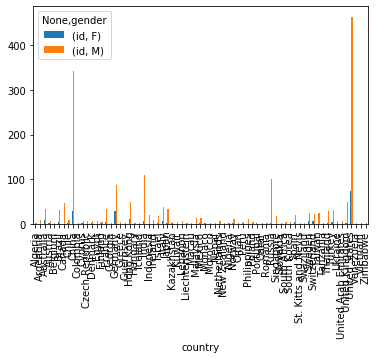

In [28]:
df.groupby(["country", "gender"]).count()[["id"]].unstack(level="gender").plot.bar()

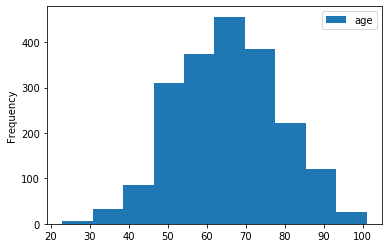

In [37]:
df[["age"]].plot.hist(10)

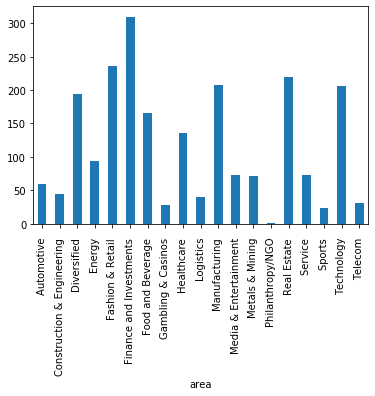

In [41]:
df.groupby("area").count().id.plot.bar()